# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [5]:
# Annoying pandas code to merge data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
#load the data
oecd_bli = pd.read_csv("BLI_25072020010530991.csv", thousands=',')
gdp_per_capita = pd.read_csv("WEO_Data.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

In [6]:
#prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

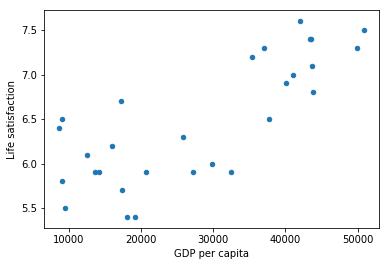

In [7]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

[[6.25984414]]
0.6116114121108724


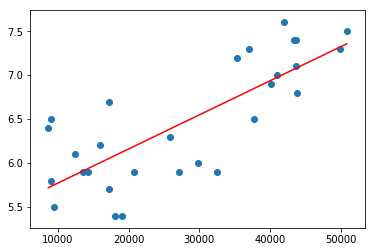

In [36]:
# slecting the linear model
model = sklearn.linear_model.LinearRegression()

model.fit(X,Y)

# make a prediction for cyprus
X_new = [[22587]] # cyprus's GDP
print(model.predict(X_new))
print(model.score(X,Y))

# line generated from model
y= .0000388236996*X+ 5.38293324

plt.plot(X, y, '-r')
plt.scatter(X,Y)
plt.show()